In [286]:
import pandas as pd
import os
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt 
import seaborn as sb

In [287]:
sharks = pd.read_csv("../data/cleaned_attacks.csv")
sharks.sample(3)

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source
1587,2005.05.15,15-May-2005,2005,Unprovoked,AUSTRALIA,Queensland,50 km east of Townsville,fishing,Ben Edelstein,M,unknown,Severe injury to lower leg,N,NaN,Blacktip shark,"J. Anderson, Townsville Bulletin, 5/21/2005"
5379,1912.00.00,1912,1912,Unprovoked,SPAIN,Balearics,Isla Cabrera,other,the governor of Cabrera,M,unknown,FATAL,Y,NaN,White shark,C. Moore. GSAF
4624,1945.05.08,08-May-1945,1945,Unprovoked,USA,North Carolina,"Ocracoke Inlet, Carteret County",swimming,Navy seaman,M,unknown,"FATAL, large gash to thigh",Y,NaN,NaN,D. Batterson (Former Navy Hospital Corpsman)


**VISUALIZATION**

    ''' Now that we've imported the clean dataset we can start and solve the hipotesis with graphics.'''

    1. Are sharks getting tired of attacking, or are humans getting more annoying?

In [288]:
year_filtered = (sharks[sharks["year"] != "unknown"])
year_filtered['Year'] = pd.to_numeric(year_filtered["year"], errors='coerce').fillna(0)
year_filtered['Year'] = year_filtered['Year'].astype(int)
attacks_count = year_filtered["Year"].value_counts().reset_index()
attacks_count.columns = ["Year", "attacks_count"]

''' I wanted to create a subset with only the years without the "unknown" and make sure they were int. 
I also wanted a scatter plot but as they work with two quantitative variables, I added the counts as the index, and  made it the y axis.'''

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_36252/3269550098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_filtered['Year'] = pd.to_numeric(year_filtered["year"], errors='coerce').fillna(0)
/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_36252/3269550098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_filtered['Year'] = year_filtered['Year'].astype(int)


' I wanted to create a subset with only the years without the "unknown" and make sure they were int. \nI also wanted a scatter plot but as they work with two quantitative variables, I added the counts as the index, and  made it the y axis.'

Text(0.5, 1.0, 'Scatter Plot of Attack Counts Over the Years')

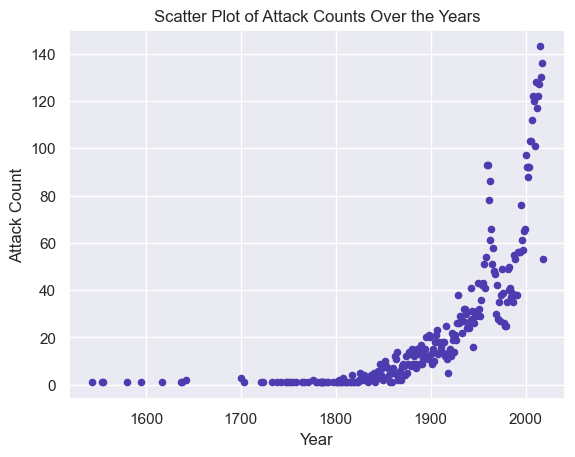

In [289]:
plt.scatter(attacks_count['Year'], attacks_count['attacks_count'], s=20, c='#4D3CAF', label='Attack Counts');
plt.xlabel('Year')
plt.ylabel('Attack Count')
plt.title('Scatter Plot of Attack Counts Over the Years')

''' As we can see in this plot, the shark attacks have increased in the last century. We can atribute that to different hypothesis. 
1. is that we have more resources to navigate
2. change of weather , although we don't have the data to demonstrate that
3. change on the human life conditions
4. maybe also change in the sense of peril

Let's see the data in another graphic so that we can analize it deeper.'''

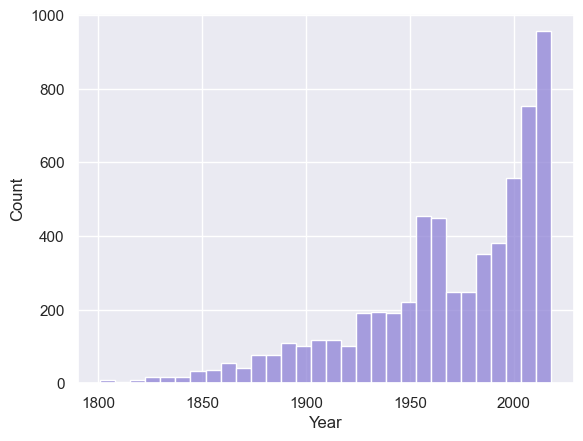

In [290]:
year_= (year_filtered[year_filtered["Year"] > 1800])
sb.histplot(x=year_.Year, bins = 30, color = "#8E82D6");

''' To be able to give response on which of our 4 hypothesis is true, we need to analize deeper.

Let's understand why the sharks are not only not getting, tired, but getting fiercer.'''

    2. If they're not getting tired, why is that? 

'''Shall we take a look at the activities people were doing when the attackes occurred?

The answer is obviously, YES, WE SHALL!! '''

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_36252/4086398150.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x = sharks["activity"], order = sharks["activity"].value_counts().index, palette="twilight");


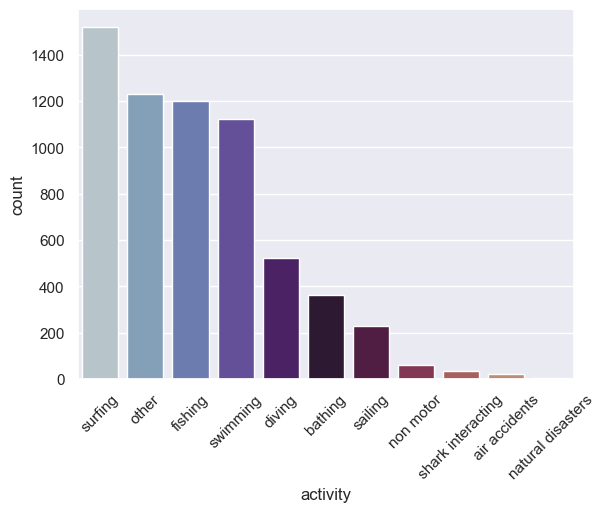

In [291]:
sb.countplot(x = sharks["activity"], order = sharks["activity"].value_counts().index, palette="twilight");
sb.set(font_scale=1.0)
plt.xticks(rotation=45)
plt.show()

''' From the data we get from the graphic, we can assume that the great mass of the attacks come from lifestyle. 

Let's get more specific and see only data on the activities from the last 50 years.

/var/folders/ns/rjvmq7zn3cggtjmkkj8bhfsc0000gn/T/ipykernel_36252/2870973720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x = recent_activity["activity"], order = recent_activity["activity"].value_counts().index, palette="crest");


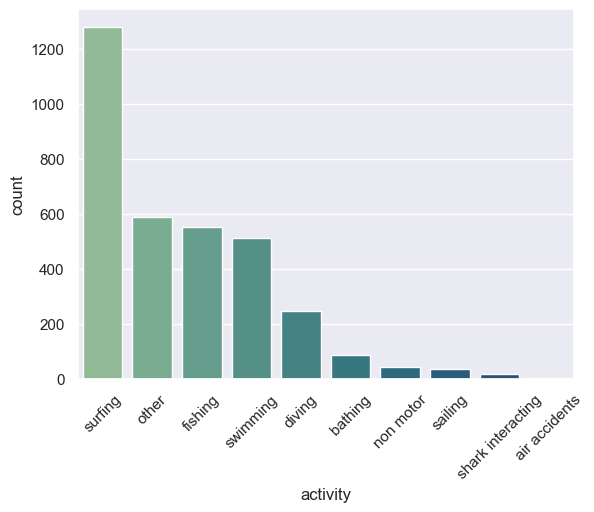

In [292]:
recent_activity = year_filtered[year_filtered["Year"] > 1970]
sb.countplot(x = recent_activity["activity"], order = recent_activity["activity"].value_counts().index, palette="crest");
sb.set(font_scale=1.0)
plt.xticks(rotation=45)
plt.show()

'''In perspective, we can see a decrease on the maybe considered more "survival" colum, fishing. And an increase of the "surf" column. But what also caught my attention is the shark interacting accidents as neither decreases or increases, so I want to check if that is because they are mostly concentrated recently or they're equally divided throughout the years. '''

In [297]:
interacting = year_filtered[year_filtered["activity"] == "shark interacting"]

<Axes: xlabel='Year', ylabel='Count'>

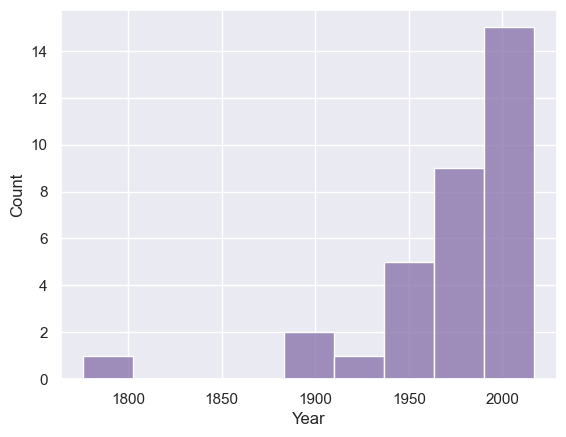

In [308]:
sb.histplot(data=interacting, x= "Year", color= "#856EA8")

'''We can see that most of the shark interacting attacks are on increase in recent years. So maybe the hypothesis that the sense of peril has changed might also be true. Also meaning that humans are getting more annoying. 

But is it all humans or just a fraction?'''

    3. Why are men more attaked than women? 
       "Let's prove the obvious answer, that we're not going to say."

In [293]:
#sns.boxplot(data=titanic, x="Pclass", y="Age");

In [294]:
#sns.histplot(data=titanic, x= "Age", hue="Pclass")

In [295]:
#facet_ = sns.FacetGrid(titanic, col="Gender")
#facet_.map(plt.hist, "Age")

cleaned: Age, Sex, Fatal, Activity, Type